In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.utils import simple_preprocess

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

pd.set_option('display.max_columns', None)
df = pd.read_csv(r'D:\Datasets\Amazon\datafiniti-consumer-reviews-of-amazon-products\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [2]:
codes = {0:'Bad', 1:'Bad', 2:'Bad', 3 : 'Average', 4 : 'Good', 5 : 'Very Good'}
df['Review_'] = df['reviews.rating'].map(codes)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",Average
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",Good
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",Very Good
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",Very Good
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",Very Good


In [3]:
df_electronics = df[df['primaryCategories'] == 'Electronics']
df_electronics['name'].value_counts()

Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers                                                               2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                           2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case                                                                          1425
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case                                                                         1212
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                                                           1024
Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers                                                                             987
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers               

In [4]:
df_fire = df[df['name'].str.contains("Fire HD 8")]
df_fire.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good


In [5]:
df_fire['name'].value_counts()

Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers              2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black          2370
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers     883
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case                 293
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case                 233
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers     160
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue            156
Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers               156
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black           140
Amazon Fire HD 8 with Alexa (8" HD Display Tablet)                                              130


In [6]:
df_fire[['col1', 'col2', 'col3', 'col4', 'col5']] = df_fire['name'].str.split(',', expand=True)
df_fire.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_,col1,col2,col3,col4,col5
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black


In [7]:
print(df_fire.shape)
df_fire.isna().sum()

(7146, 30)


id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateSeen          0
reviews.didPurchase    7146
reviews.doRecommend       0
reviews.id             7116
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title             0
reviews.username          0
sourceURLs                0
Review_                   0
col1                      0
col2                    130
col3                    130
col4                    130
col5                   4298
dtype: int64

In [8]:
df_fire['col1'].value_counts()

All-New Fire HD 8 Tablet                              2848
Fire HD 8 Tablet with Alexa                           2599
All-New Fire HD 8 Tablet with Alexa                   1043
All-New Fire HD 8 Kids Edition Tablet                  526
Amazon Fire HD 8 with Alexa (8" HD Display Tablet)     130
Name: col1, dtype: int64

In [9]:
df_fire['col2'].value_counts()

 8 HD Display    7016
Name: col2, dtype: int64

In [10]:
df_fire['col3'].value_counts()

 16 GB    3326
 Wi-Fi    2848
 32 GB     842
Name: col3, dtype: int64

In [11]:
df_fire['col4'].value_counts()

 Tangerine - with Special Offers      2599
 16 GB - Includes Special Offers      2437
 Marine Blue - with Special Offers    1043
 32 GB - Includes Special Offers       411
 Pink Kid-Proof Case                   293
 Blue Kid-Proof Case                   233
Name: col4, dtype: int64

In [12]:
df_fire['col5'].value_counts()

 Black      2510
 Blue        223
 Magenta     115
Name: col5, dtype: int64

## Analyzing the Tablets without Alexa (Non Kids)

In [13]:
df_fire_noalexa = df_fire[~df_fire["col1"].str.contains('Alexa')]
df_fire_noalexa = df_fire_noalexa[~df_fire_noalexa['col1'].str.contains('Kids')]
df_fire_noalexa['col1'].value_counts()

All-New Fire HD 8 Tablet    2848
Name: col1, dtype: int64

In [14]:
df_fire_noalexa['Review_Length'] = df_fire_noalexa['reviews.text'].map(len)
df_fire_noalexa.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,Review_,col1,col2,col3,col4,col5,Review_Length
13386,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-24T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,While there are some apps that are missing due...,. Nice hand sized tablet,greg,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,323
13388,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2016-12-14T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I bought one last year for one cousin and had ...,2nd purchase,VanStriker,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,95
13392,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-18T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,4,http://reviews.bestbuy.com/3545/5538501/review...,I will try again for the 3rd time with my new ...,3rd time is the charm,HotTNMomma,http://reviews.bestbuy.com/3545/5620406/review...,Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,90
13393,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-01-17T00:00:00.000Z,"2017-08-09T00:00:00Z,2017-03-05T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5538501/review...,"bought this for my father, who never did much ...",5 star service,packersfan,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,257
13394,AVqVGWQDv8e3D1O-ldFr,2017-03-03T16:55:53Z,2019-03-09T07:13:43Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","B018SZT3BK,B01AHB9CN2",Amazon,"Fire Tablets,Computers/Tablets & Networking,El...",Electronics,http://i.ebayimg.com/thumbs/images/g/9DAAAOSwE...,amazonfirehd88intablet16gbblackb018szt3bk6thge...,Amazon,53-004484,2017-03-21T00:00:00.000Z,"2017-04-30T00:00:00Z,2017-06-07T00:00:00Z,2017...",NaN,True,NaN,0.0,5,http://reviews.bestbuy.com/3545/5620406/review...,This was a request from our 7 yr old granddaug...,7 year old granddaughter loves it,Intheknow,http://reviews.bestbuy.com/3545/5620406/review...,Very Good,All-New Fire HD 8 Tablet,8 HD Display,Wi-Fi,16 GB - Includes Special Offers,Black,400


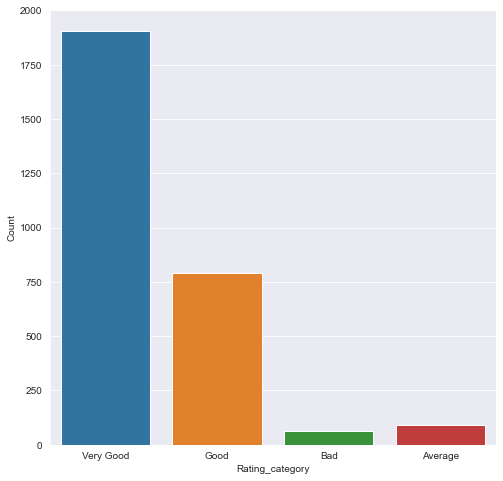

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='Review_', data=df_fire_noalexa)
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

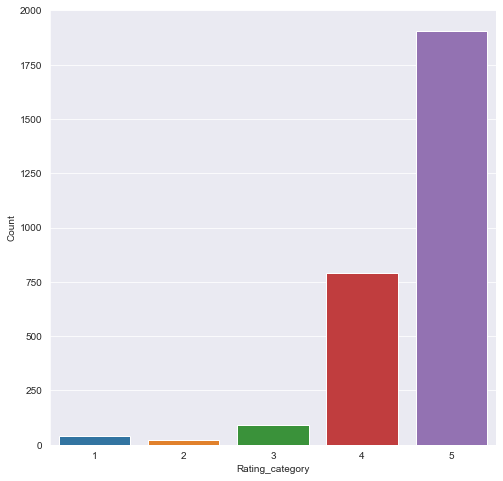

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(x='reviews.rating', data=df_fire_noalexa)
plt.xlabel('Rating_category')
plt.ylabel('Count')
plt.show()

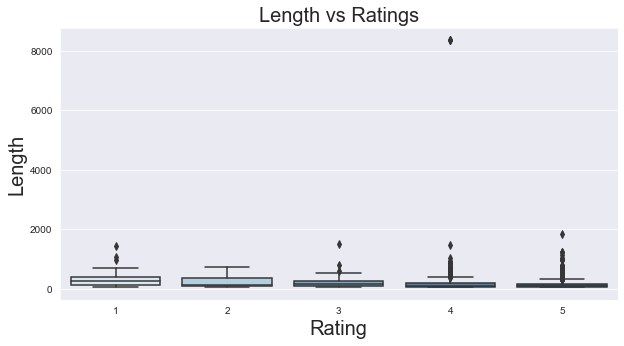

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_fire_noalexa['reviews.rating'], df_fire_noalexa['Review_Length'], palette = 'Blues')
plt.title("Length vs Ratings", fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Length', fontsize=20);

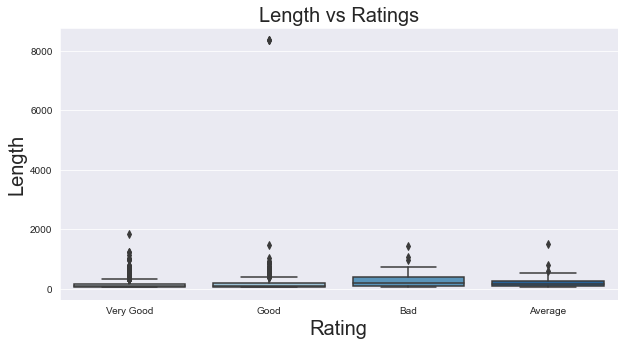

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(df_fire_noalexa['Review_'], df_fire_noalexa['Review_Length'], palette = 'Blues')
plt.title("Length vs Ratings", fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Length', fontsize=20);

In [19]:
df_fire_noalexa['reviews.text'] = df_fire_noalexa['reviews.text'].map(lambda x: re.sub('[,\.!?]', '', x))
df_fire_noalexa['reviews.text'] = df_fire_noalexa['reviews.text'].map(lambda x: x.lower())

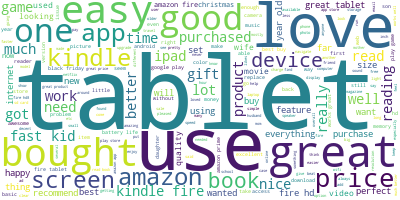

In [20]:
long_string = ','.join(list(df_fire_noalexa['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [21]:
df_1 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 1]
df_2 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 2]
df_3 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 3]
df_4 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 4]
df_5 = df_fire_noalexa[df_fire_noalexa['reviews.rating'] == 5]

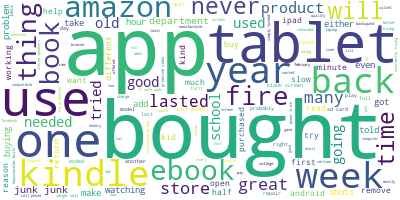

In [22]:
long_string = ','.join(list(df_1['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

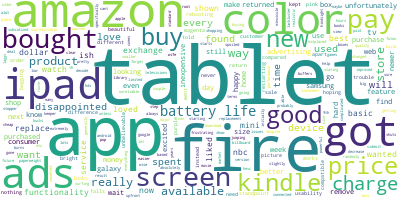

In [23]:
long_string = ','.join(list(df_2['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

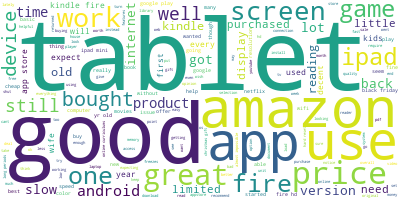

In [24]:
long_string = ','.join(list(df_3['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

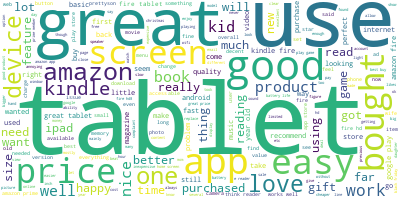

In [25]:
long_string = ','.join(list(df_4['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

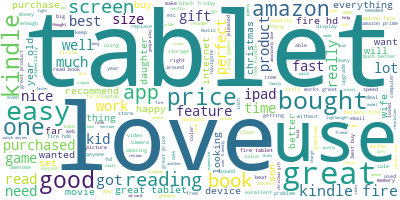

In [26]:
long_string = ','.join(list(df_5['reviews.text'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [27]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_fire_noalexa['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['apps', 'missing', 'due', 'using', 'google', 'play', 'store', 'list', 'minimal', 'tablet', 'quick', 'responsive', 'noticeable', 'nicer', 'fire', 'picked', 'sale', 'black', 'friday', 'sales', 'great', 'front', 'tv', 'catching', 'email', 'light', 'web', 'browsing']


In [28]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [29]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"tablet" + 0.023*"use" + 0.017*"great" + 0.014*"screen" + '
  '0.013*"size" + 0.011*"fire" + 0.011*"easy" + 0.010*"price" + '
  '0.010*"product" + 0.009*"books"'),
 (1,
  '0.041*"tablet" + 0.022*"great" + 0.018*"price" + 0.015*"good" + '
  '0.014*"amazon" + 0.013*"love" + 0.012*"fire" + 0.012*"use" + 0.011*"kindle" '
  '+ 0.008*"well"'),
 (2,
  '0.033*"tablet" + 0.022*"great" + 0.016*"good" + 0.015*"one" + '
  '0.014*"bought" + 0.014*"kindle" + 0.011*"much" + 0.011*"fire" + '
  '0.010*"price" + 0.009*"ipad"'),
 (3,
  '0.024*"kindle" + 0.023*"great" + 0.021*"fire" + 0.015*"easy" + '
  '0.014*"bought" + 0.013*"use" + 0.012*"love" + 0.010*"loves" + '
  '0.009*"screen" + 0.009*"new"'),
 (4,
  '0.026*"tablet" + 0.025*"great" + 0.024*"use" + 0.019*"amazon" + '
  '0.016*"easy" + 0.013*"one" + 0.010*"bought" + 0.009*"good" + 0.009*"fire" + '
  '0.008*"screen"')]


In [30]:
import pyLDAvis
import pickle 
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Overall_1' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.016329  0.005680       1        1  29.803067
0     -0.012054 -0.028552       2        1  19.326722
4     -0.024258 -0.011482       3        1  18.855612
3      0.050952 -0.011936       4        1  18.289248
2      0.001689  0.046291       5        1  13.725350, topic_info=        Term         Freq        Total Category  logprob  loglift
24    tablet  1191.000000  1191.000000  Default  30.0000  30.0000
125   kindle   511.000000   511.000000  Default  29.0000  29.0000
60       use   681.000000   681.000000  Default  28.0000  28.0000
114    loves   232.000000   232.000000  Default  27.0000  27.0000
90      size   214.000000   214.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
37    amazon    41.343092   494.997765   Topic5  -4.9706  -0.4967
490  reading    28.764502   218.996093   Topic5  -5.3334  -0.0440
90      size    27.326419   214.067139   Topic5  -5.3847  -0.0725
62      well    26.995409   211.596096   Topic5  -5.3969  -0.0731
60       use    35.775189   681.943914   Topic5  -5.1153  -0.9618

[422 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
419       1  0.189859  absolutely
419       2  0.135613  absolutely
419       3  0.027123  absolutely
419       4  0.406840  absolutely
419       5  0.216981  absolutely
...     ...       ...         ...
36        1  0.359288        year
36        2  0.062485        year
36        3  0.124970        year
36        4  0.367098        year
36        5  0.085917        year

[838 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

In [31]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_1['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['bring', 'back', 'exchange', 'different', 'make']


In [32]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [33]:
from pprint import pprint
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"tablet" + 0.012*"bought" + 0.009*"kindle" + 0.008*"apps" + '
  '0.008*"use" + 0.008*"get" + 0.007*"year" + 0.007*"one" + 0.007*"last" + '
  '0.007*"back"'),
 (1,
  '0.012*"bought" + 0.012*"apps" + 0.011*"junk" + 0.010*"week" + 0.010*"use" + '
  '0.010*"one" + 0.009*"tablet" + 0.008*"get" + 0.008*"back" + 0.007*"amazon"')]


In [34]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Bad' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.014257  0.0       1        1  54.020849
1     -0.014257  0.0       2        1  45.979151, topic_info=           Term      Freq     Total Category  logprob  loglift
242        junk  8.000000  8.000000  Default  30.0000  30.0000
270        week  9.000000  9.000000  Default  29.0000  29.0000
407  department  4.000000  4.000000  Default  28.0000  28.0000
409      ebooks  4.000000  4.000000  Default  27.0000  27.0000
250       phone  5.000000  5.000000  Default  26.0000  26.0000
..          ...       ...       ...      ...      ...      ...
264      trying  2.504708  4.910458   Topic2  -5.4188   0.1038
41         also  2.442226  4.916396   Topic2  -5.4441   0.0773
212        good  2.438290  4.916701   Topic2  -5.4457   0.0756
418       store  2.526448  5.643780   Topic2  -5.4102  -0.0268
113      kindle  2.584675  8.579584   Topic2  -5.3874  -0.4228

[150 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
205       1  0.696787       ad
232       1  0.360688      add
232       2  0.721376      add
401       1  0.288175  already
401       2  0.576349  already
...     ...       ...      ...
270       2  0.666357     week
210       1  0.703053    would
210       2  0.468702    would
149       1  0.773415     year
149       2  0.309366     year

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [35]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_2['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['need', 'basic', 'tablet', 'fire', 'works', 'falls', 'apart', 'compared', 'ipad', 'mini', 'usability', 'functionality', 'available', 'apps', 'standpoint']


In [36]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [37]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"apps" + 0.011*"bought" + 0.011*"tablet" + 0.010*"ipad" + 0.009*"get" '
  '+ 0.009*"nbc" + 0.009*"amazon" + 0.009*"buy" + 0.009*"really" + '
  '0.008*"got"'),
 (1,
  '0.016*"tablet" + 0.014*"color" + 0.013*"got" + 0.012*"good" + 0.012*"fire" '
  '+ 0.010*"get" + 0.009*"pay" + 0.008*"life" + 0.008*"battery" + 0.008*"ads"'),
 (2,
  '0.022*"tablet" + 0.015*"amazon" + 0.014*"charge" + 0.014*"ads" + '
  '0.012*"fire" + 0.012*"would" + 0.009*"apps" + 0.008*"ipad" + 0.008*"device" '
  '+ 0.008*"every"')]


In [38]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Bad2' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.010028 -0.028533       1        1  43.715512
0     -0.030251  0.020352       2        1  31.809764
2      0.040279  0.008181       3        1  24.474723, topic_info=         Term      Freq     Total Category  logprob  loglift
241    charge  2.000000  2.000000  Default  30.0000  30.0000
162     would  2.000000  2.000000  Default  29.0000  29.0000
63        nbc  1.000000  1.000000  Default  28.0000  28.0000
12     tablet  7.000000  7.000000  Default  27.0000  27.0000
129       ads  4.000000  4.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
44        pay  0.772267  3.711029   Topic3  -5.0371  -0.1622
91     screen  0.706195  3.035788   Topic3  -5.1265  -0.0508
137  consumer  0.675209  1.762274   Topic3  -5.1714   0.4482
141      even  0.655099  1.770548   Topic3  -5.2016   0.4133
78      happy  0.650080  1.763914   Topic3  -5.2093   0.4093

[185 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
129       1  0.488253          ads
129       2  0.244127          ads
129       3  0.488253          ads
130       1  0.534657  advertising
131       1  0.429215       amazon
...     ...       ...          ...
312       3  0.913422         wifi
263       1  0.778721       within
313       3  0.913549      without
162       1  0.353331        would
162       3  0.353331        would

[195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [39]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_3['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['hoping', 'use', 'google', 'launcher', 'tablet', 'really', 'locked', 'cannot', 'change', 'launcher', 'lock', 'screen', 'still', 'cheap', 'fine', 'watching', 'movies']


In [40]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


In [41]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"tablet" + 0.018*"good" + 0.013*"ipad" + 0.012*"fire" + '
  '0.011*"amazon" + 0.010*"price" + 0.009*"get" + 0.008*"kindle" + 0.008*"one" '
  '+ 0.008*"app"'),
 (1,
  '0.017*"use" + 0.015*"fire" + 0.014*"good" + 0.014*"tablet" + 0.013*"amazon" '
  '+ 0.010*"great" + 0.010*"price" + 0.007*"one" + 0.007*"old" + '
  '0.006*"screen"'),
 (2,
  '0.021*"tablet" + 0.013*"good" + 0.011*"great" + 0.011*"apps" + 0.011*"play" '
  '+ 0.011*"google" + 0.010*"use" + 0.010*"amazon" + 0.007*"wife" + '
  '0.007*"fire"')]


In [42]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Avg' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.037704  0.022316       1        1  41.534351
1      0.005523 -0.037047       2        1  30.977180
2     -0.043227  0.014732       3        1  27.488469, topic_info=       Term       Freq      Total Category  logprob  loglift
14      use  17.000000  17.000000  Default  30.0000  30.0000
98     play   9.000000   9.000000  Default  29.0000  29.0000
4    google   8.000000   8.000000  Default  28.0000  28.0000
594    wife   5.000000   5.000000  Default  27.0000  27.0000
37    great  14.000000  14.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
167   store   2.548225   9.321511   Topic3  -5.2951  -0.0055
224    slow   2.342602   6.984231   Topic3  -5.3792   0.1990
22   kindle   2.552806  12.336661   Topic3  -5.2933  -0.2840
114    like   2.459242  10.768249   Topic3  -5.3306  -0.1853
31      app   2.435178  10.879003   Topic3  -5.3404  -0.2054

[226 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
667       2  0.704730  actually
302       3  0.517961       ads
430       3  0.512672    adults
120       1  0.387002    amazon
120       2  0.338627    amazon
...     ...       ...       ...
338       3  0.203477     would
652       1  0.665967     wound
750       1  0.666255       wry
110       1  0.794954      year
110       2  0.264985      year

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [43]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_4['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['bought', 'one', 'last', 'year', 'one', 'cousin', 'continue', 'another', 'year', 'great', 'buy', 'imo']


In [44]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2)]


In [45]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"tablet" + 0.014*"great" + 0.014*"good" + 0.012*"screen" + '
  '0.011*"use" + 0.010*"kindle" + 0.010*"fire" + 0.010*"amazon" + 0.009*"like" '
  '+ 0.008*"bought"'),
 (1,
  '0.032*"tablet" + 0.028*"great" + 0.014*"use" + 0.013*"price" + 0.013*"good" '
  '+ 0.011*"amazon" + 0.010*"device" + 0.010*"screen" + 0.009*"fire" + '
  '0.009*"easy"'),
 (2,
  '0.023*"tablet" + 0.017*"amazon" + 0.017*"use" + 0.014*"good" + 0.011*"apps" '
  '+ 0.011*"bought" + 0.010*"fire" + 0.010*"price" + 0.010*"well" + '
  '0.009*"one"')]


In [46]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'Good' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.023058 -0.016257       1        1  47.116043
2     -0.027816 -0.009133       2        1  33.721863
0      0.004758  0.025390       3        1  19.162094, topic_info=          Term        Freq       Total Category  logprob  loglift
5        great  258.000000  258.000000  Default  30.0000  30.0000
48      screen  123.000000  123.000000  Default  29.0000  29.0000
167       like   90.000000   90.000000  Default  28.0000  28.0000
1       bought  105.000000  105.000000  Default  27.0000  27.0000
56      kindle  111.000000  111.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
104      games   12.317311   69.571653   Topic3  -5.3937  -0.0791
28   purchased   11.191273   57.680392   Topic3  -5.4896   0.0125
23      device   12.449041  106.775864   Topic3  -5.3831  -0.4969
85        play   10.919541   66.777758   Topic3  -5.5142  -0.1586
264    reading   10.473691   58.566605   Topic3  -5.5559  -0.0691

[264 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
509       1  0.287028           able
509       2  0.574056           able
509       3  0.114811           able
493       1  0.680164  advertisement
1567      2  0.941955          along
...     ...       ...            ...
163       2  0.405828          would
163       3  0.177550          would
859       1  0.142797             yr
859       2  0.713983             yr
859       3  0.142797             yr

[405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [47]:
stop_words = stopwords.words('english')
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = df_5['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

data_words = remove_stopwords(data_words)

['apps', 'missing', 'due', 'using', 'google', 'play', 'store', 'list', 'minimal', 'tablet', 'quick', 'responsive', 'noticeable', 'nicer', 'fire', 'picked', 'sale', 'black', 'friday', 'sales', 'great', 'front', 'tv', 'catching', 'email', 'light', 'web', 'browsing']


In [48]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


In [49]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"kindle" + 0.018*"tablet" + 0.017*"fire" + 0.015*"great" + '
  '0.013*"use" + 0.012*"bought" + 0.012*"one" + 0.011*"love" + 0.011*"price" + '
  '0.011*"screen"'),
 (1,
  '0.041*"tablet" + 0.022*"great" + 0.017*"loves" + 0.013*"good" + 0.013*"use" '
  '+ 0.012*"price" + 0.009*"buy" + 0.008*"kindle" + 0.008*"best" + '
  '0.008*"bought"'),
 (2,
  '0.033*"great" + 0.029*"tablet" + 0.019*"use" + 0.019*"easy" + 0.018*"love" '
  '+ 0.015*"fire" + 0.015*"amazon" + 0.014*"kindle" + 0.011*"price" + '
  '0.011*"bought"')]


In [50]:
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) + 'VeryGood' +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.014699  0.029795       1        1  52.184609
0     -0.021588 -0.026249       2        1  27.783875
1      0.036287 -0.003546       3        1  20.031516, topic_info=        Term        Freq       Total Category  logprob  loglift
24    tablet  719.000000  719.000000  Default  30.0000  30.0000
84     loves  192.000000  192.000000  Default  29.0000  29.0000
299     good  244.000000  244.000000  Default  28.0000  28.0000
461      buy  112.000000  112.000000  Default  27.0000  27.0000
81      best  119.000000  119.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
204   amazon   28.159736  259.880398   Topic3  -5.2087  -0.6145
322     love   30.126108  348.502209   Topic3  -5.1412  -0.8404
88       one   24.859333  250.473163   Topic3  -5.3333  -0.7023
365  reading   21.711312  148.931259   Topic3  -5.4687  -0.3178
412     like   21.031082  124.660652   Topic3  -5.5006  -0.1717

[266 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
334       1  0.352769    absolutely
334       2  0.128280    absolutely
334       3  0.513119    absolutely
2410      3  0.747468  accidentally
1332      1  0.895477    advertised
...     ...       ...           ...
254       2  0.310313          year
254       3  0.285488          year
79        1  0.180979            yr
79        2  0.542936            yr
79        3  0.271468            yr

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])